In [33]:
import pandas as pd

data = pd.read_csv('data.csv', delimiter='\t')
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P7,P8,P9,P10,age,gender,accuracy,country,source,elapsed
0,1,4,2,3,3,2,3,4,4,3,...,1,2,5,2,17,1,92,US,6,914
1,4,3,4,3,4,4,4,4,2,2,...,3,2,2,2,37,1,100,US,1,891
2,3,4,4,4,4,4,4,3,2,2,...,2,3,3,3,31,1,80,US,6,903
3,4,5,4,4,4,3,3,2,2,2,...,2,3,4,4,32,1,93,US,1,806
4,4,0,4,4,4,3,5,1,2,4,...,4,2,3,2,46,2,87,NZ,1,1826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,24,1,100,IN,1,274
49155,4,5,4,4,4,3,5,3,2,3,...,3,4,4,4,22,1,50,ZA,1,584
49156,2,4,2,3,3,3,4,4,2,4,...,3,4,5,4,29,2,85,BE,6,932
49157,4,4,4,4,4,4,4,4,1,3,...,2,4,5,4,48,1,95,CZ,2,1212


In [62]:
# Look at some basic stats for A1 question. Exclude people that did not answer or that took < 1 min for entire test.
data[(data['A1'] > 0) & (data['elapsed'] > 60) & (data['country'] == 'IN')]['A1'].describe()

count    3123.000000
mean        3.857829
std         0.927009
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: A1, dtype: float64

In [35]:
# There are 163 questions in the survey
data.T.head(163).T

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,1,4,2,3,3,2,3,4,4,3,...,5,5,5,4,4,5,1,2,5,2
1,4,3,4,3,4,4,4,4,2,2,...,4,4,4,2,3,2,3,2,2,2
2,3,4,4,4,4,4,4,3,2,2,...,3,3,4,2,4,2,2,3,3,3
3,4,5,4,4,4,3,3,2,2,2,...,4,2,2,2,3,4,2,3,4,4
4,4,0,4,4,4,3,5,1,2,4,...,4,3,4,3,4,3,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
49155,4,5,4,4,4,3,5,3,2,3,...,3,3,3,4,2,3,3,4,4,4
49156,2,4,2,3,3,3,4,4,2,4,...,2,2,4,4,3,2,3,4,5,4
49157,4,4,4,4,4,4,4,4,1,3,...,2,2,3,3,4,2,2,4,5,4


In [38]:
# Here are the people that filled out all 163 questions (no 0 blank answers)
full = data[(data.T.head(163) != 0).all()][:]
full

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P7,P8,P9,P10,age,gender,accuracy,country,source,elapsed
0,1,4,2,3,3,2,3,4,4,3,...,1,2,5,2,17,1,92,US,6,914
1,4,3,4,3,4,4,4,4,2,2,...,3,2,2,2,37,1,100,US,1,891
3,4,5,4,4,4,3,3,2,2,2,...,2,3,4,4,32,1,93,US,1,806
5,3,5,4,4,4,5,5,1,1,4,...,4,4,2,5,36,2,80,IT,3,669
6,4,2,5,4,2,4,4,2,1,3,...,4,2,3,4,35,1,80,US,1,717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49152,4,4,4,4,4,4,4,2,2,2,...,2,4,4,4,24,2,95,IN,2,705
49153,4,4,5,4,3,3,5,3,1,2,...,2,4,2,4,19,2,15,US,1,361
49154,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,24,1,100,IN,1,274
49156,2,4,2,3,3,3,4,4,2,4,...,3,4,5,4,29,2,85,BE,6,932


In [41]:
# Compute new column for total A attribute (with + and - based on question)
full['Aall'] = data['A1'] + data['A2'] + data['A3'] + data['A4'] + data['A5'] + data['A6'] + data['A7'] - data['A8'] - data['A9'] - data['A10']
full

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P8,P9,P10,age,gender,accuracy,country,source,elapsed,Aall
0,1,4,2,3,3,2,3,4,4,3,...,2,5,2,17,1,92,US,6,914,7
1,4,3,4,3,4,4,4,4,2,2,...,2,2,2,37,1,100,US,1,891,18
3,4,5,4,4,4,3,3,2,2,2,...,3,4,4,32,1,93,US,1,806,21
5,3,5,4,4,4,5,5,1,1,4,...,4,2,5,36,2,80,IT,3,669,24
6,4,2,5,4,2,4,4,2,1,3,...,2,3,4,35,1,80,US,1,717,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49152,4,4,4,4,4,4,4,2,2,2,...,4,4,4,24,2,95,IN,2,705,22
49153,4,4,5,4,3,3,5,3,1,2,...,4,2,4,19,2,15,US,1,361,22
49154,1,1,1,1,1,1,1,1,1,1,...,1,1,1,24,1,100,IN,1,274,4
49156,2,4,2,3,3,3,4,4,2,4,...,4,5,4,29,2,85,BE,6,932,11


In [42]:
full['Aall'].describe()

count    35381.000000
mean        18.911054
std          6.287054
min         -8.000000
25%         16.000000
50%         20.000000
75%         23.000000
max         32.000000
Name: Aall, dtype: float64

<AxesSubplot: ylabel='Frequency'>

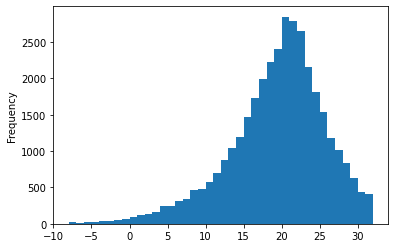

In [44]:
full['Aall'].plot.hist(bins=40)

In [45]:
full['Aall'].quantile([0.2, 0.4, 0.6, 0.8])

0.2    14.0
0.4    18.0
0.6    21.0
0.8    24.0
Name: Aall, dtype: float64

In [7]:
import fitter

Fitting 1 distributions: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.69s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,0.000425,371.075588,-645221.612963,0.011523,0.047814,9.897190e-71


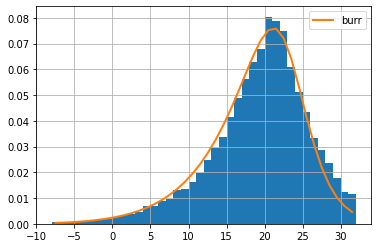

In [46]:
x = full['Aall'].values
f = fitter.Fitter(x, bins=40, distributions=['burr'])
f.fit()
f.summary()

In [47]:
f.fitted_param['burr']

(28.413818205088347,
 0.33738508217949714,
 -37.88507143511057,
 61.65044072600016)

In [49]:
full['Arank'] = full['Aall'].rank(pct=True)
full

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P9,P10,age,gender,accuracy,country,source,elapsed,Aall,Arank
0,1,4,2,3,3,2,3,4,4,3,...,5,2,17,1,92,US,6,914,7,0.049702
1,4,3,4,3,4,4,4,4,2,2,...,2,2,37,1,100,US,1,891,18,0.383087
3,4,5,4,4,4,3,3,2,2,2,...,4,4,32,1,93,US,1,806,21,0.602287
5,3,5,4,4,4,5,5,1,1,4,...,2,5,36,2,80,IT,3,669,24,0.803496
6,4,2,5,4,2,4,4,2,1,3,...,3,4,35,1,80,US,1,717,19,0.448390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49152,4,4,4,4,4,4,4,2,2,2,...,4,4,24,2,95,IN,2,705,22,0.679319
49153,4,4,5,4,3,3,5,3,1,2,...,2,4,19,2,15,US,1,361,22,0.679319
49154,1,1,1,1,1,1,1,1,1,1,...,1,1,24,1,100,IN,1,274,4,0.025437
49156,2,4,2,3,3,3,4,4,2,4,...,5,4,29,2,85,BE,6,932,11,0.107459


In [50]:
full['Aall'].quantile([0.1 * x for x in range(11)])

0.0    -8.0
0.1    11.0
0.2    14.0
0.3    17.0
0.4    18.0
0.5    20.0
0.6    21.0
0.7    22.0
0.8    24.0
0.9    26.0
1.0    32.0
Name: Aall, dtype: float64